
The direct colab link to this notebook is [here](https://colab.research.google.com/github/D3Mlab/ppandas/blob/master/experiments/2014_Toronto_Mayoral_Election_CoLab.ipynb).

# Package Imports

In [0]:
!pip install -i https://test.pypi.org/simple/ PPandas==0.0.1.6.9

Looking in indexes: https://test.pypi.org/simple/


In [0]:
!pip install pgmpy==0.1.9
!pip install networkx==2.4
!pip install matplotlib
!pip install python-intervals
!pip install geopandas
!pip install geovoronoi

In [0]:
import pandas as pd
import numpy as np
from ppandas import PDataFrame

# Data Processing

### Toronto Election Study (TES)


Create a DataFrame using the TES dataset columns of Age, Ward, and mayoral candidate preference. The TES dataset can be found [here](http://www.torontoelectionstudy.com/data).

In [0]:
TES_df  = pd.read_stata('Toronto+Election+Study.dta')[['AGE','CPS5','CPS9']]
TES_df.head()

,AGE,CPS5,CPS9
0,68.0,Ward 23 Willowdale (Current Councillor: John F...,John Tory
1,65.0,Ward 13 Parkdale-High Park (Current Councillor...,John Tory
2,65.0,Ward 35 Scarborough Southwest (Current Council...,Don't know or haven't decided
3,68.0,Ward 13 Parkdale-High Park (Current Councillor...,John Tory
4,49.0,Ward 9 York Centre (Current Councillor: Maria ...,Other


There are 3000 respondents in the TES dataset

In [0]:
TES_df.describe()

,AGE
count,3000.0000
mean,50.0060
std,15.4017
min,18.0000
25%,37.0000
50%,50.0000
75%,62.0000
max,114.0000




*   Convert the Age attribute into bins: (17,23], (23,28),...,(63,114]
*   Rename DataFrame columns to and convert them to type string




In [0]:
# Age
age_values = [17,23,28,33,38,43,48,53,58,63,114]
TES_df['AGE'] = pd.cut(TES_df['AGE'],age_values)
TES_df.astype({'AGE': str})

# Ward
TES_df.CPS5 = TES_df['CPS5'].str.replace(r"[\D]",'')
TES_df.rename({'CPS5':'WARD44'},axis=1, inplace=True)
TES_df = TES_df[TES_df['WARD44'] !='']

# Candidate Vote - before election who they were leaning towards
mapDict = {'Doug Ford':'Doug Ford', 'Olivia Chow':'Olivia Chow', 'John Tory':'John Tory', 'Other':'Other', "Don't know or haven't decided": 'Unknown'}
TES_df.CPS9=TES_df.CPS9.map(mapDict)
TES_df.rename({'CPS9':'VOTE'},axis=1, inplace=True)
TES_df = TES_df[TES_df['VOTE'] !='Unknown']

### Census

Create two dataframes that contain Toronto's census population breakdown by Age bin and by Ward. This data can be found [here](https://open.toronto.ca/dataset/ward-profiles-2014-2018-wards/)

In [0]:
age_marginal_df = pd.read_csv('census2011_age.csv')
print(age_marginal_df)
ward_marginal_df = pd.read_csv('census2011_ward.csv')
print(ward_marginal_df)

         AGE  Unnamed: 1
0    [17,19]    0.042431
1    [20,24]    0.085112
2    [25,29]    0.098280
3    [30,34]    0.093321
4    [35,39]    0.088327
5    [40,44]    0.091572
6    [45,49]    0.096310
7    [50,54]    0.088740
8    [55,59]    0.075400
9    [60,64]    0.065394
10  [65,114]    0.175115
    WARD44  '2011 Census %
0        1        0.023447
1        2        0.021691
2        3        0.019973
3        4        0.020894
4        5        0.024479
5        6        0.022559
6        7        0.019917
7        8        0.019250
8        9        0.017606
9       10        0.024791
10      11        0.023856
11      12        0.020651
12      13        0.020370
13      14        0.020560
14      15        0.023728
15      16        0.020644
16      17        0.019315
17      18        0.017196
18      19        0.021888
19      20        0.029292
20      21        0.018600
21      22        0.025053
22      23        0.033817
23      24        0.023844
24      25        0.02229

# ppandas Analysis

Create TES PDataFrame where independent nodes are Age and Ward and the dependent nodes are the ones not specified as independent nodes, which is Vote

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


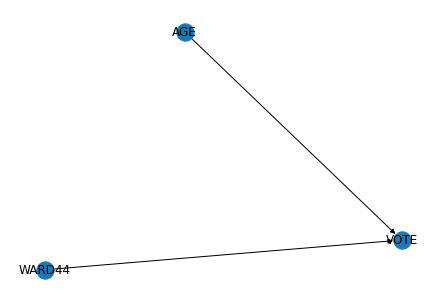

+----------------+-----------+
| AGE((17, 23])  | 0.0183946 |
+----------------+-----------+
| AGE((23, 28])  | 0.0535117 |
+----------------+-----------+
| AGE((28, 33])  | 0.0890468 |
+----------------+-----------+
| AGE((33, 38])  | 0.0898829 |
+----------------+-----------+
| AGE((38, 43])  | 0.0794314 |
+----------------+-----------+
| AGE((43, 48])  | 0.0957358 |
+----------------+-----------+
| AGE((48, 53])  | 0.0961538 |
+----------------+-----------+
| AGE((53, 58])  | 0.116221  |
+----------------+-----------+
| AGE((58, 63])  | 0.117475  |
+----------------+-----------+
| AGE((63, 114]) | 0.244147  |
+----------------+-----------+
+------------+------------+
| WARD44(1)  | 0.014214   |
+------------+------------+
| WARD44(10) | 0.0259197  |
+------------+------------+
| WARD44(11) | 0.0188127  |
+------------+------------+
| WARD44(12) | 0.00752508 |
+------------+------------+
| WARD44(13) | 0.0250836  |
+------------+------------+
| WARD44(14) | 0.0192308  |
+------------

In [0]:
TES_pdf = PDataFrame(independent_vars = ['AGE','WARD44'], data =  TES_df)
TES_pdf.visualise(show_tables=True)

Create PDataFrames using the Toronto Census Age and Ward DataFrames. Since these DataFrames are aggregate-level (each row is not an individual sample), use the ".from_populational_data" method and provide the total number of participants in the census using the "num_of_records" argument.

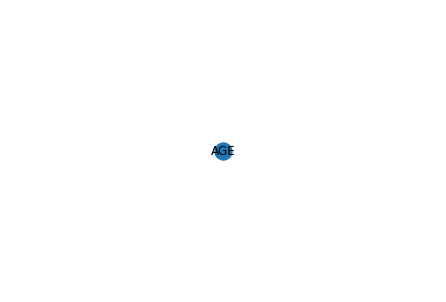

+---------------+-----------+
| AGE([17,19])  | 0.0424307 |
+---------------+-----------+
| AGE([20,24])  | 0.0851118 |
+---------------+-----------+
| AGE([25,29])  | 0.0982796 |
+---------------+-----------+
| AGE([30,34])  | 0.0933205 |
+---------------+-----------+
| AGE([35,39])  | 0.0883266 |
+---------------+-----------+
| AGE([40,44])  | 0.0915716 |
+---------------+-----------+
| AGE([45,49])  | 0.0963104 |
+---------------+-----------+
| AGE([50,54])  | 0.0887395 |
+---------------+-----------+
| AGE([55,59])  | 0.0754001 |
+---------------+-----------+
| AGE([60,64])  | 0.0653937 |
+---------------+-----------+
| AGE([65,114]) | 0.175115  |
+---------------+-----------+


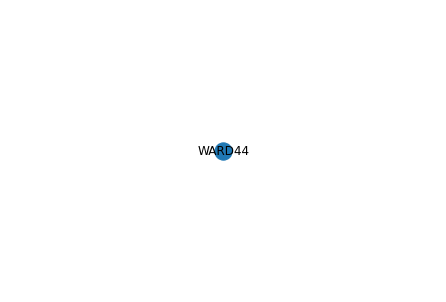

In [0]:
age_marginal_pdf = PDataFrame.from_populational_data(independent_vars =["AGE"],data = age_marginal_df, num_of_records=2615090)
age_marginal_pdf.visualise(show_tables=True)
ward_marginal_pdf = PDataFrame.from_populational_data(["WARD44"],ward_marginal_df,2615090)
ward_marginal_pdf.visualise()

Replace TES marginal distributions of Age and Ward with census distributions by performing a two pjoins. 

The first pjoin uses "age_marginal_pdf" as the reference model for the independent variable Age. Since there is numerical mismatch between how TES represents Age and how the census represents Age ([17,19],[20,24],...,[65,114]) the "mismatches" argument is used where a dictionary is passed. The dictionary key is the name of the variable exhibiting mismatch and the value is the type of mismatch. To handle this numerical mismatch, a cross product between the two Age representations is computed. Therefore the resulting join_pdf has the census's marginal distribution for Age, the TES's marginal distribution for Ward and TES's conditional probability distribution P(Vote|Age, Ward).

The second pjoin uses "ward_marginal_pdf" as the reference model for the independent variable Ward. Therefore the resulting join_pdf has the census's marginal distribution for Age and Ward and the TES's conditional probability distribution P(Vote|Age,Ward).

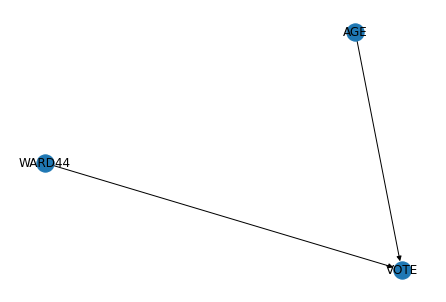

+---------------+-----------+
| AGE((17,19])  | 0.0424307 |
+---------------+-----------+
| AGE([20,23])  | 0.0638339 |
+---------------+-----------+
| AGE((23,24])  | 0.021278  |
+---------------+-----------+
| AGE([25,28])  | 0.0737097 |
+---------------+-----------+
| AGE((28,29])  | 0.0245699 |
+---------------+-----------+
| AGE([30,33])  | 0.0699904 |
+---------------+-----------+
| AGE((33,34])  | 0.0233301 |
+---------------+-----------+
| AGE([35,38])  | 0.066245  |
+---------------+-----------+
| AGE((38,39])  | 0.0220817 |
+---------------+-----------+
| AGE([40,43])  | 0.0686787 |
+---------------+-----------+
| AGE((43,44])  | 0.0228929 |
+---------------+-----------+
| AGE([45,48])  | 0.0722328 |
+---------------+-----------+
| AGE((48,49])  | 0.0240776 |
+---------------+-----------+
| AGE([50,53])  | 0.0665546 |
+---------------+-----------+
| AGE((53,54])  | 0.0221849 |
+---------------+-----------+
| AGE([55,58])  | 0.05655   |
+---------------+-----------+
| AGE((58,

In [0]:
join_pdf = age_marginal_pdf.pjoin(TES_pdf,mismatches={"AGE":'numerical'})
join_pdf = ward_marginal_pdf.pjoin(join_pdf)
join_pdf.visualise(show_tables=True)

Perform Variable Elimination to query P(Vote)

In [0]:
print('ppandas 2011 Census + TES(n = {}):'.format(join_pdf.num_of_records))
queryResults= join_pdf.query(['VOTE'])
print(queryResults)

ppandas 2011 Census + TES(n = 5232572):
          VOTE  Probability(VOTE)
0    Doug Ford           0.289286
1    John Tory           0.432552
2  Olivia Chow           0.247602
3        Other           0.030560
